In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
for dirname, _, filenames in os.walk('/Users/yongxingnie/Desktop/data science methods and tools/assigment 2/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/yongxingnie/Desktop/data science methods and tools/assigment 2/data/.DS_Store
/Users/yongxingnie/Desktop/data science methods and tools/assigment 2/data/Breast Cancer Wisconsin Dataset.csv
/Users/yongxingnie/Desktop/data science methods and tools/assigment 2/data/IRIS.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data='/Users/yongxingnie/Desktop/data science methods and tools/assigment 2/data/IRIS.csv'
df=pd.DataFrame(pd.read_csv(data))

In [4]:
df.shape

(150, 5)

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
df.isnull().sum()*100/df.shape[0]

sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
species         0.0
dtype: float64

In [10]:
iris_outcome = pd.crosstab(index=df["species"], columns="count")
iris_outcome

col_0,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [11]:
feature_columns = ['sepal_length', 'sepal_width', 'petal_length','petal_width']
X = df[feature_columns].values
X=df.drop(['species'], axis=1)
y = df['species'].values

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


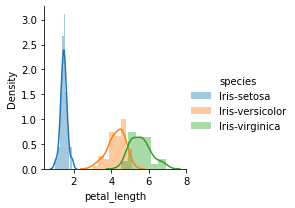

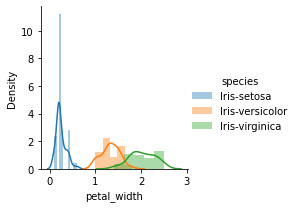

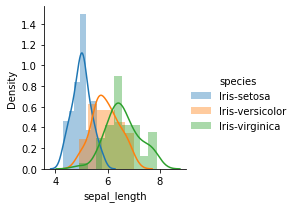

In [13]:
sns.FacetGrid(df,hue="species",size=3).map(sns.distplot,"petal_length").add_legend()
sns.FacetGrid(df,hue="species",size=3).map(sns.distplot,"petal_width").add_legend()
sns.FacetGrid(df,hue="species",size=3).map(sns.distplot,"sepal_length").add_legend()
plt.show()

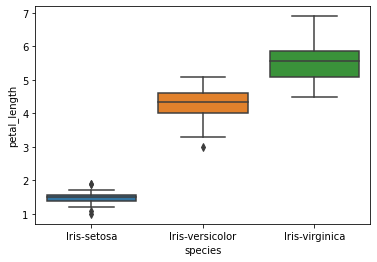

In [14]:
sns.boxplot(x="species",y="petal_length",data=df)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 108)

In [16]:
X_train.shape, X_test.shape

((120, 4), (30, 4))

In [17]:
cols = X_train.columns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.978875,1.723964,-1.163452,-1.174119
1,0.007190,-0.086764,0.684978,0.688506
2,-1.102134,-2.350174,-0.239237,-0.375851
3,-0.732359,1.497623,-1.394506,-1.440208
4,2.225838,-0.086764,1.262613,1.353729


In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [19]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[15,  0,  0],
       [ 0,  8,  3],
       [ 0,  0,  4]])

In [20]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 90.0 %.


In [21]:
k_list = list(range(1,50,2))
cv_scores = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

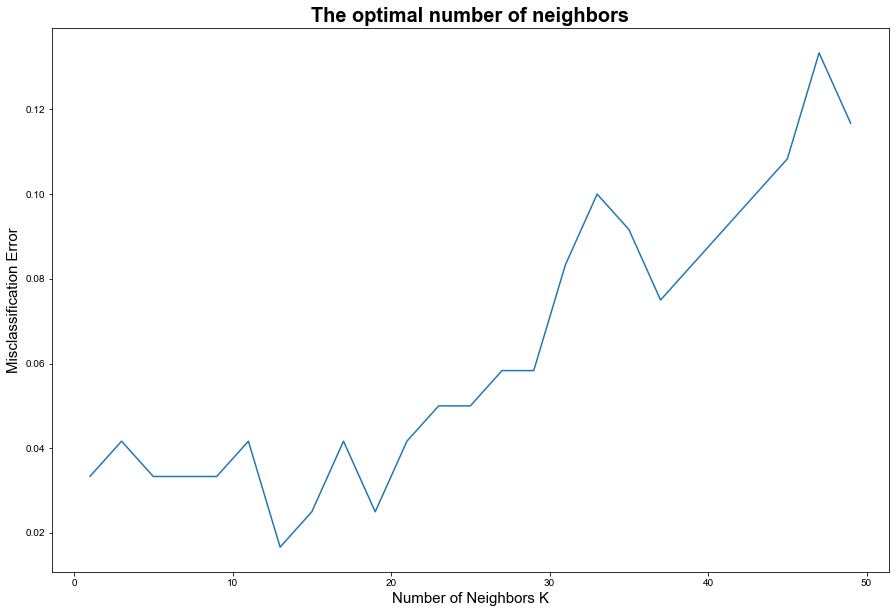

In [22]:
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [23]:
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 13.


In [28]:
knn=KNeighborsClassifier(n_neighbors=13).fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred_train = knn.predict(X_train)
print('When n_neighbors=13, we get the highest accuracy score')
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

When n_neighbors=13, we get the highest accuracy score
Training set score: 0.9750
Test set score: 0.9000


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.73      0.84        11
           2       0.57      1.00      0.73         4

    accuracy                           0.90        30
   macro avg       0.86      0.91      0.86        30
weighted avg       0.94      0.90      0.91        30



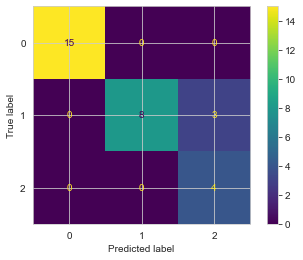

In [29]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred, labels=[0,1,2])
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=[0,1,2])
display.plot()